# Guia Prático de Ciência de Dados com MLflow

# Aula Prática: Análise e Preparação de Dados

Este notebook utiliza um dataset público (Titanic) para demonstrar, passo a passo, os seguintes tópicos:

- Análise exploratória e interpretação dos dados
- Limpeza e tratamento de dados
- Manipulação de dados qualitativos (label encoding, one-hot)
- Manipulação de dados quantitativos (normalização, padronização)

Ao final, você terá uma base preparada para modelagem.


## Conteúdos Abordados
1. **MLflow**
2. **Extração de Dados**
3. **Tipos de Dados**
4. **Engenharia de Features**
5. **Armazenamento e Versionamento de Features com MLflow**
    

## Importando Bibliotecas Necessárias

In [ ]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.6/752.6 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.6 MB/s eta 0:00:00


In [ ]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# MLflow para rastreamento de experimentos
import mlflow

# Supressão de avisos
import warnings
warnings.filterwarnings("ignore")

## Noções Básicas sobre o MLflow

In [ ]:
# Iniciar um experimento no MLflow
mlflow.start_run()

# Registrar um parâmetro
mlflow.log_param("parametro1", "valor1")

# Registrar uma métrica
mlflow.log_metric("metrica1", 0.85)

# Encerrar o experimento
mlflow.end_run()

print("Experimento do MLflow registrado com sucesso.")

Experimento do MLflow registrado com sucesso.


## Extração de Dados

In [ ]:
# Exemplo: Importando um dataset do Kaggle
# Antes de rodar, certifique-se que a API do Kaggle está configurada e kaggle.json está em ~/.kaggle
# Instalar Kaggle caso não esteja instalado: !pip install kaggle

# Comando para baixar um dataset do Kaggle
# Exemplo: Dataset do Titanic
#!kaggle competitions download -c titanic

# Descompactar o arquivo
#!unzip titanic.zip -y

# Carregar o dataset
dados = pd.read_csv("/train.csv")
dados.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) Análise Exploratória e Interpretação dos Dados

Nesta seção, investigamos a estrutura, tipos, valores ausentes e distribuições. Também examinamos relações entre variáveis.

Passos:
- Visualizar amostras (`head`) e dimensões (`shape`)
- Tipos e resumo (`info`, `describe`)
- Valores ausentes
- Distribuições (numéricas e categóricas)
- Relações e correlações numéricas

In [ ]:
display(dados.head())

# Exibir informações sobre o dataset
print(dados.info())

# Exibir dimensões do dataset
print('Dimensões:', dados.shape)

# Exibir estatísticas básicas
display(dados.describe())

# Verificar valores ausentes
display(dados.isnull().sum().sort_values(ascending=False))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Dimensões: (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


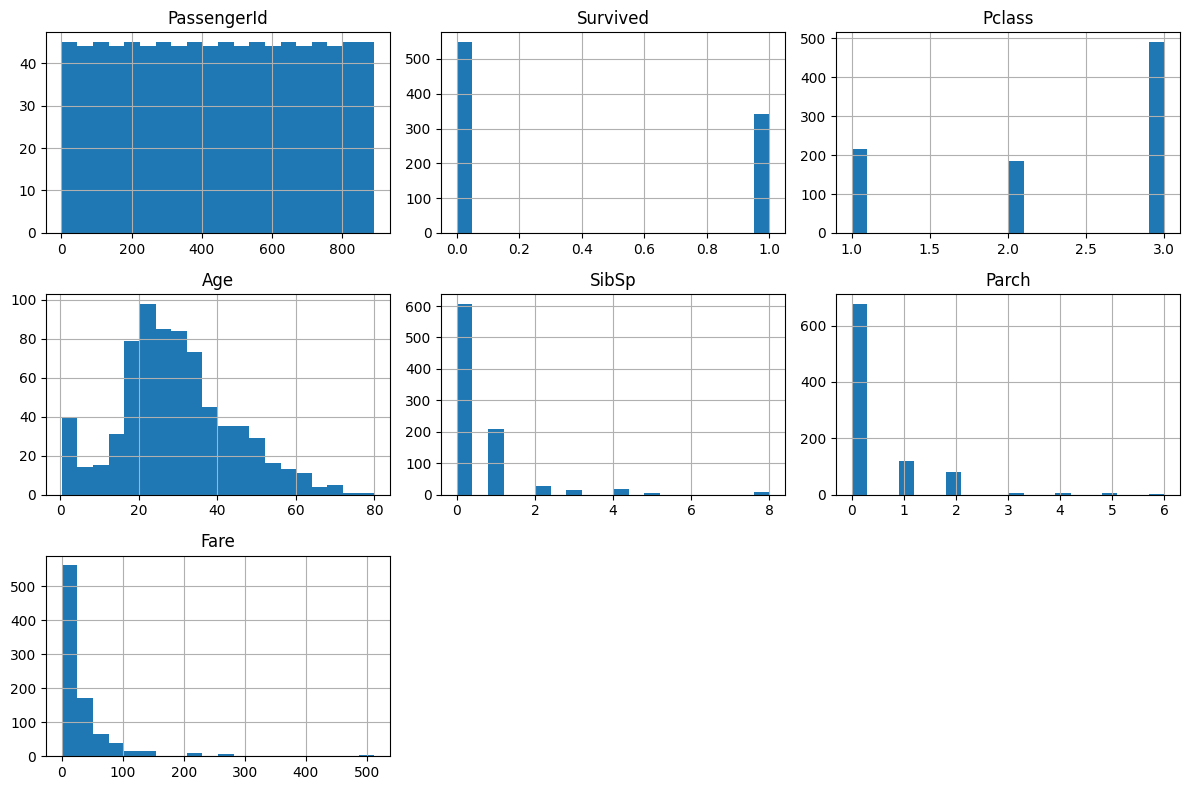

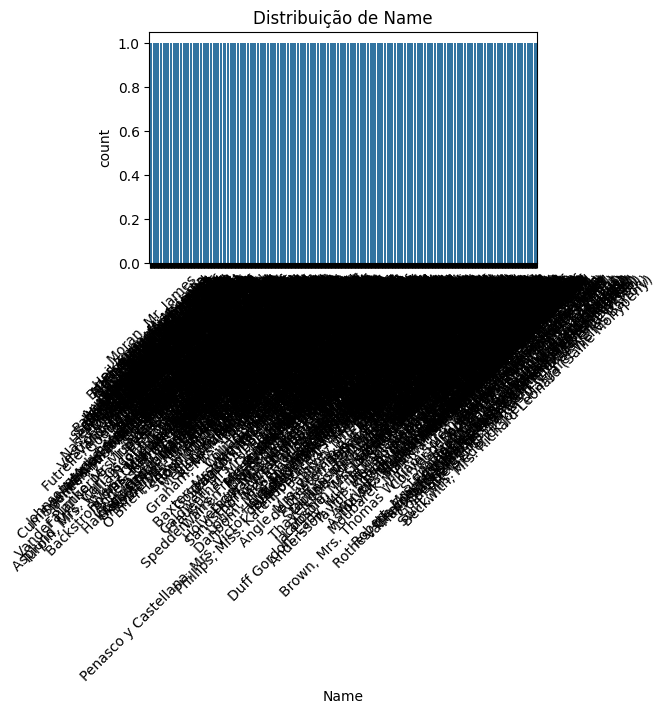

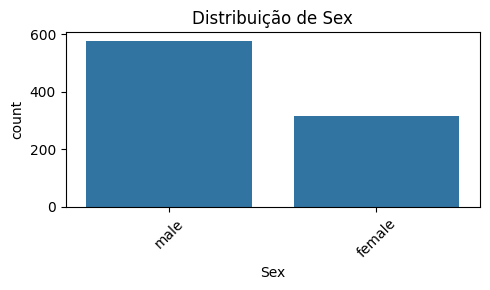

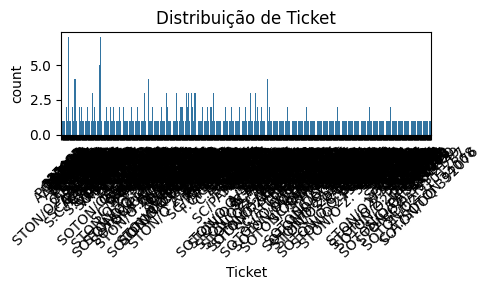

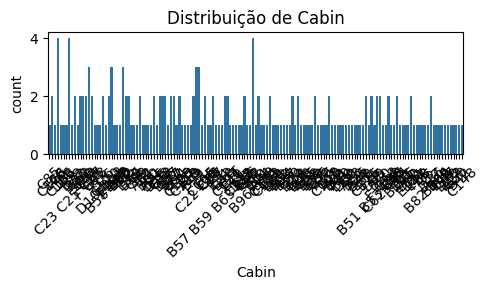

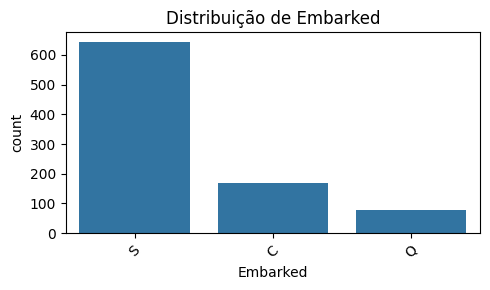

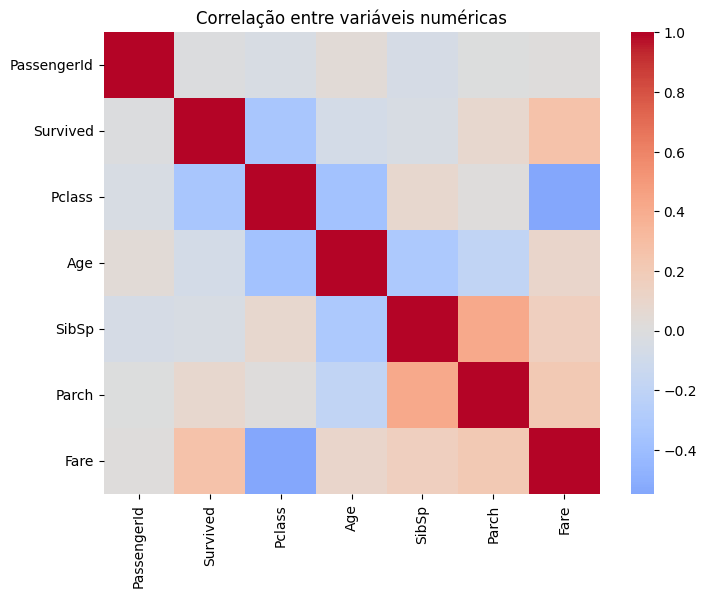

In [ ]:
# Distribuições numéricas (histogramas)
num_cols = dados.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    dados[num_cols].hist(figsize=(12, 8), bins=20)
    plt.tight_layout()
    plt.show()

# Distribuições categóricas (countplot)
cat_cols = dados.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
for c in cat_cols[:6]:  # limitar para visualização rápida
    plt.figure(figsize=(5,3))
    sns.countplot(x=c, data=dados)
    plt.title(f'Distribuição de {c}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Mapa de correlação (apenas colunas numéricas)
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    corr = dados[num_cols].corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlação entre variáveis numéricas')
    plt.show()

### Interpretação dos histogramas (variáveis numéricas)

- **PassengerId**
  - Identificador sequencial; distribuição aproximadamente uniforme por ser apenas um índice. Não tem significado analítico direto e normalmente é descartado como feature.

- **Survived**
  - Variável-alvo binária (0 = não sobreviveu, 1 = sobreviveu). Observa-se desbalanceamento moderado entre classes, o que pode impactar métricas de modelagem e exigir técnicas de balanceamento.

- **Pclass**
  - Classe do ticket (1, 2, 3). A maioria dos passageiros viajava na 3ª classe. Essa variável é ordinal e costuma ter forte relação com a sobrevivência (proxy de status socioeconômico).

- **Age**
  - Distribuição assimétrica à direita, concentrada entre ~20 e ~40 anos, com cauda longa. Possíveis valores ausentes requerem imputação. Crianças e idosos são minoria.

- **SibSp** (irmãos/cônjuges a bordo)
  - Forte concentração em 0; poucos passageiros tinham muitos acompanhantes nesse grupo. Distribuição altamente assimétrica.

- **Parch** (pais/filhos a bordo)
  - Também concentrada em 0, com poucos casos maiores que 2. Assimetria semelhante a `SibSp`.

- **Fare**
  - Altamente assimétrica à direita, com muitos valores baixos e poucos valores muito altos (outliers). Escalonamento e, em alguns casos, transformação logarítmica podem ajudar modelos sensíveis à escala.

Observações gerais:
- **Assimetria** e **outliers** são comuns em `Fare` e, em menor grau, `Age`.
- **Cardinalidade baixa** em `Pclass`, `SibSp` e `Parch` sugere bom potencial para técnicas categóricas/ordinais ou binarizações específicas.
- Antes da modelagem, considere: imputação de `Age`, tratamento de outliers em `Fare`, e avaliação de impacto do desbalanceamento de `Survived`.

### Interpretação do mapa de correlação (variáveis numéricas)

- **O que mede**
  - Correlação de Pearson no intervalo [-1, 1].\n  Vermelho = correlação positiva; Azul = negativa; quanto mais intenso, mais forte.

- **PassengerId**
  - Correlações próximas de 0 com quase todas as variáveis: é um identificador sequencial, sem significado analítico. Normalmente deve ser descartado.

- **Survived vs Pclass** (negativa)
  - Quanto maior o número da classe (pior a classe), menor a chance de sobrevivência. Sinal coerente com diferenças de acesso a botes/socorro.

- **Survived vs Fare** (positiva)
  - Passagens mais caras (geralmente classes melhores) associam-se a maior probabilidade de sobrevivência. Relação moderada.

- **Survived vs Age** (fraca)
  - Relação fraca; idade por si só não explica fortemente o desfecho. Pode haver efeitos não lineares (ex.: crianças).

- **Pclass vs Fare** (negativa forte/moderada)
  - Multicolinearidade potencial: `Pclass` e `Fare` capturam aspectos semelhantes de status socioeconômico. Cuidado ao usar ambos em modelos sensíveis a colinearidade.

- **SibSp vs Parch** (positiva)
  - Famílias viajando juntas tendem a ter mais de um desses contadores > 0. Pode indicar redundância parcial entre essas variáveis.

- **Demais relações**
  - Correlações numéricas em geral são baixas, sugerindo que interações, variáveis categóricas (ex.: `Sex`, `Embarked`) e engenharia de features podem agregar mais sinal.

- **Implicações para modelagem**
  - Avaliar remover `PassengerId`.
  - Monitorar colinearidade entre `Pclass` e `Fare` (regularização, PCA ou seleção de features).
  - Considerar variáveis categóricas e interações, além de transformações (ex.: `log(Fare)`).

## 2) Limpeza e Tratamento de Dados

Estratégias comuns:
- Remoção de duplicatas
- Imputação de valores ausentes em variáveis numéricas (ex.: mediana)
- Imputação de valores ausentes em variáveis categóricas (ex.: moda)

Abaixo, aplicamos essas estratégias preservando o dataset original em `dados_limpos`.

In [ ]:
dados_limpos = dados.copy()

# Remover duplicatas
antes = dados_limpos.shape[0]
dados_limpos.drop_duplicates(inplace=True)
depois = dados_limpos.shape[0]
print(f'Duplicatas removidas: {antes - depois}')

# Imputação para colunas numéricas com mediana
num_cols = dados_limpos.select_dtypes(include=[np.number]).columns
medianas = dados_limpos[num_cols].median()
dados_limpos[num_cols] = dados_limpos[num_cols].fillna(medianas)

# Imputação para colunas categóricas com moda (valor mais frequente)
cat_cols = dados_limpos.select_dtypes(include=['object', 'category', 'bool']).columns
for c in cat_cols:
    moda = dados_limpos[c].mode(dropna=True)
    if not moda.empty:
        dados_limpos[c] = dados_limpos[c].fillna(moda.iloc[0])
    else:
        dados_limpos[c] = dados_limpos[c].fillna('Desconhecido')

print('Valores ausentes restantes (depois da imputação):')
display(dados_limpos.isnull().sum().sort_values(ascending=False).head(10))

Duplicatas removidas: 0
Valores ausentes restantes (depois da imputação):


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## 3) Manipulação de Dados Qualitativos (Categóricos)

Mostraremos duas abordagens:
- Label Encoding (apto para variáveis ordinais ou binárias)
- One-Hot Encoding (apto para variáveis nominais com múltiplas categorias)

Criaremos duas versões transformadas a partir de `dados_limpos` para fins didáticos.

In [ ]:
dados_label = dados_limpos.copy()
dados_onehot = dados_limpos.copy()

# LABEL ENCODING: aplica em colunas categóricas, útil se forem ordinais/binárias
le_map = {}
cat_cols = dados_label.select_dtypes(include=['object', 'category', 'bool']).columns
for c in cat_cols:
    le = LabelEncoder()
    dados_label[c] = le.fit_transform(dados_label[c].astype(str))
    le_map[c] = dict(zip(le.classes_, le.transform(le.classes_)))

print('Exemplo de mapeamento em uma coluna (se existir):')
if le_map:
    exemplo_col = list(le_map.keys())[0]
    print(exemplo_col, '->', list(le_map[exemplo_col])[:5], '...')

# ONE-HOT ENCODING: cria colunas dummies para categorias
dados_onehot = pd.get_dummies(dados_onehot, drop_first=False, dtype=int)
print('Formato após One-Hot:', dados_onehot.shape)
display(dados_onehot.head())

Exemplo de mapeamento em uma coluna (se existir):
Name -> ['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward', 'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel', 'Abelson, Mrs. Samuel (Hannah Wizosky)'] ...
Formato após One-Hot: (891, 1731)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 4) Manipulação de Dados Quantitativos (Normalização e Padronização)

- Normalização (MinMaxScaler): escala valores para um intervalo [0, 1] (ou customizado). Útil quando queremos preservar a forma da distribuição e comparabilidade entre features.
- Padronização (StandardScaler): transforma para média 0 e desvio padrão 1. Útil quando suposições de modelos consideram variáveis centradas/escaladas.

Aplicaremos as duas técnicas sobre as colunas numéricas de `dados_label` (pois já tratamos os categóricos com Label Encoding).

In [ ]:
dados_scaled_minmax = dados_label.copy()
dados_scaled_standard = dados_label.copy()

num_cols = dados_label.select_dtypes(include=[np.number]).columns

minmax = MinMaxScaler()
dados_scaled_minmax[num_cols] = minmax.fit_transform(dados_scaled_minmax[num_cols])

standard = StandardScaler()
dados_scaled_standard[num_cols] = standard.fit_transform(dados_scaled_standard[num_cols])

print('Visualização após Normalização (Min-Max):')
display(dados_scaled_minmax[num_cols].describe().T.head())

print('Visualização após Padronização (Standard):')
display(dados_scaled_standard[num_cols].describe().T.head())

Visualização após Normalização (Min-Max):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,0.500000,0.289162,0.0,0.25,0.5,0.75,1.0
Survived,891.0,0.383838,0.486592,0.0,0.00,0.0,1.00,1.0
Pclass,891.0,0.654321,0.418036,0.0,0.50,1.0,1.00,1.0
Name,891.0,0.500000,0.289162,0.0,0.25,0.5,0.75,1.0
Sex,891.0,0.647587,0.477990,0.0,0.00,1.0,1.00,1.0


Visualização após Padronização (Standard):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,6.379733e-17,1.000562,-1.730108,-0.865054,0.000000,0.865054,1.730108
Survived,891.0,3.987333e-17,1.000562,-0.789272,-0.789272,-0.789272,1.266990,1.266990
Pclass,891.0,-8.772133e-17,1.000562,-1.566107,-0.369365,0.827377,0.827377,0.827377
Name,891.0,-1.993666e-18,1.000562,-1.730108,-0.865054,0.000000,0.865054,1.730108
Sex,891.0,-1.156327e-16,1.000562,-1.355574,-1.355574,0.737695,0.737695,0.737695


In [ ]:
# Criar um único dataset final e salvar em 'dados_processados.csv'
# Estratégia:
# - Base: `dados_limpos`
# - Categóricas: One-Hot Encoding (sem dropar categoria)
# - Numéricas: Padronização (StandardScaler), exceto a coluna-alvo `Survived` (se existir)

from sklearn.preprocessing import StandardScaler

if 'dados_limpos' not in globals():
    raise RuntimeError("dados_limpos não está disponível. Execute as etapas de limpeza antes desta célula.")

# Identificar colunas de tipos originais (antes do one-hot)
cat_cols_orig = dados_limpos.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_cols_orig = dados_limpos.select_dtypes(include=[np.number]).columns.tolist()

# One-Hot nas categóricas
_df = pd.get_dummies(dados_limpos, columns=cat_cols_orig, drop_first=False, dtype=int)

# Definir alvo e quais numéricas escalar
target_cols = [c for c in ['Survived'] if c in _df.columns]
num_to_scale = [c for c in num_cols_orig if c not in target_cols and c in _df.columns]

# Padronizar numéricas (mantendo alvo intacto)
if num_to_scale:
    _scaler_final = StandardScaler()
    _df[num_to_scale] = _scaler_final.fit_transform(_df[num_to_scale])

# Renomear dataset final
dados_processados = _df.copy()

# Salvar
processed_data_path = "dados_processados.csv"
dados_processados.to_csv(processed_data_path, index=False)
print(f"dados_processados salvo: {processed_data_path} | shape: {dados_processados.shape}")

dados_processados salvo: dados_processados.csv | shape: (891, 1731)


## Armazenamento e Versionamento de Features com MLflow

In [ ]:
# Salvar o dataset processado como um arquivo CSV
processed_data_path = "dados_processados.csv"
dados.to_csv(processed_data_path, index=False)
print("Dataset processado salvo localmente.")

# Registrar o dataset processado como artefato no MLflow
mlflow.start_run()  # Iniciar um novo experimento
mlflow.log_artifact(processed_data_path)  # Registrar o arquivo como artefato
mlflow.end_run()  # Encerrar o experimento

print("Features armazenadas e versionadas com sucesso no MLflow!")

Dataset processado salvo localmente.
Features armazenadas e versionadas com sucesso no MLflow!
